# Python Visualization for Exploration of Data
## Stephen Elston and Ronald Lopez
## Presented at PyData San Francisco, August 2016  

In these lessons we will be working with a data set containing the prices and characteristics of a number of automobiles. The ultimate goal is to build a model for predicting the price of a car from its characteristics. However, in this lesson we will focus on data exploration using visualization techniques. 

## About this Jupyter Notebook
This notebook contains material to help you learn how to expore data visually. This notebook and the data set can be downloaded from GitHub:

**https://github.com/Quantia-Analytics/DyDataSF2016Visualization**  

This notebook was constructed using using the Anconda 3.5 Python distribution. If you are not running version Anaconda 3.5 or higher we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continum Analytics web site](https://www.continuum.io/downloads

To run this notebook you need the seaborn graphics packages. If you have not done so, you will need to install seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your compute type the following command. If no errors occur, you will have installed seaborn.

``pip install seaborn``


## About Us

These lessons have been prepared by:

**Steve Elston**

- Co-founder and principle consultant Quantia Analytics, LLC 
- Instructor, University of Washington data science program
- Decades of experience in predictive analytics and machine learning
- Long term Python and R (S/SPLUS) user and developer 
- Azure ML advisor to Microsoft
- Experience in several industries: payment, telecom, capital markets, logistics
- PhD in Geophysics from Princeton University


**Ronald Lopez**

## Why visualizeation?

Visualization is an essential method in any data scientist’s toolbox. Visualization is a key first step in the exploration of most data sets. As a general rule, you should never start creating models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

The concepts of exploring a data set visually were pioniered by John Tukey in the 1960s and 1970s. Tukey published his pioneering book in the late 1970s, ***John Tukey, Exploratory Data Analysis, 1977, Addison-Westley***.

Bill Cleveland documented his seminal work in visualization of complex data sets in his book, ***William S. Cleveland, Visualizing Data, 1993, Hobart Press***

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relatiships in the data set. Specifically using visualization when you appraoch a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships.
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships.
- Use plot aesthetics to project multiple dimensions. 
- Apply conditioning or faceting methods to project multiple dimensions



These lessons are divided into three parts. In each part you will learn how to use the visualization tools availble in Python.

- **Overview of plot types** is a reivew of creating basic plot types used to construct visualizations.
- **Using Asthetics** is an overview of how to project additional plot dimensions using plot asthetics.
- **Conditioned plotting** also know as faceted plotting introduces a powerful method for visualizing higher dimensional data. 

In the exercises, you will use both pandas plotting and the seaborn package. We assume you have at least a bit of experience using pandas and Jupyter notebooks.  



## Load and examine the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. 

Execute the code in this cell to load the data into your notebook. **Make sure you have the .csv file in your working directory!**

In [41]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values
    auto_prices.dropna(axis = 0, inplace = True)
#    auto_prices = auto_prices[pd.notnull(auto_prices)]


    ## Convert some columns to numeric values
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    auto_prices[cols] = auto_prices[cols].convert_objects(convert_numeric=True)
#    auto_prices[cols] = auto_prices[cols].to_numeric()

#    auto_prices = auto_prices[np.isfinite(auto_prices[cols])]

    return auto_prices
auto_prices = read_auto_data()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Using the pandas head method let's have a first look at the columns in this data set. 

In [42]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


You can see there are both numerical and string (categorical) variable types. As a next step examine some summary statistics of the numeric columns using the pandas describe method. Note that units of measurement are American not Metric.  

In [43]:
auto_prices.describe()

C:\Users\Steve\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Basic chart types

Now that we have loaded and had a first look at the data, let's get to work making some charts. 

There are enumerable chart types which have been created and used for data exploration. In this tutorial we will focus on the most used chart types:

- **Scatter plot**
- **Line plots**
- **Bar plots**
- **Histograms**
- **Box plots**
- **Violin plots**

### Scatter plots

Scatter plots show the relationship be two variables in the form of dots on the plot. In simple terms the values along a horizontal axis are plotted against a vertical axis. 

The pandas package contains a number of useful plot methods which operate on data frames. The simple recipe for plotting from pandas data frames is:

- Use the plot method, specifing the ``kind`` argument, or ise a chart-specific plot method.
- Specify the columns with the values for the ``x`` and ``y`` axes. 

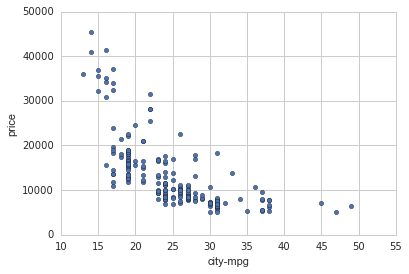

In [44]:
%matplotlib inline 
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price')

Our basic recipe worked, but it does not give us much control over the result. 

We can take advantage of the fact that pandas plot methods are built on matplotlib. Thus, we can specify a figure and one or more axes within that figure. We can control many plot attributes once we have specified the axes. Our improved recipe looks like this:

- Specify a figure, including a size.
- Define one or more axis within the figure.
- Use the pandas plot method of choice. Make sure you specify the asis you are using. 
- Use methods on the axes to control attributes like titles and axis labels. 

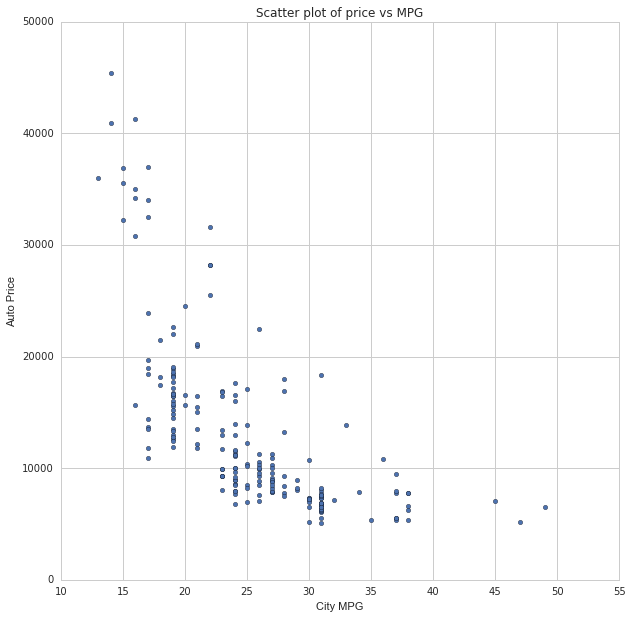

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot of price vs MPG') # Give the plot a main title
ax.set_xlabel('City MPG') # Set text for the x axis
ax.set_ylabel('Auto Price')# Set text for y axis

In the plot above, we can see that the most costly cars have the lowest fuel efficiency, whereas relatively inexpensive cars are also economical to drive. 


### Line plots

Line plots are similar to point plots. In line plots the discrete points are connected by lines.

First, we will create a dataframe, with a simple relationship between x and y.

In [46]:
import pandas as pd
x = list(range(100))
y = [x * x for x in range(100)]
df = pd.DataFrame({'x':x, 'y':y})

Now, apply the pervious recipe to plot x vs y as a line chart.

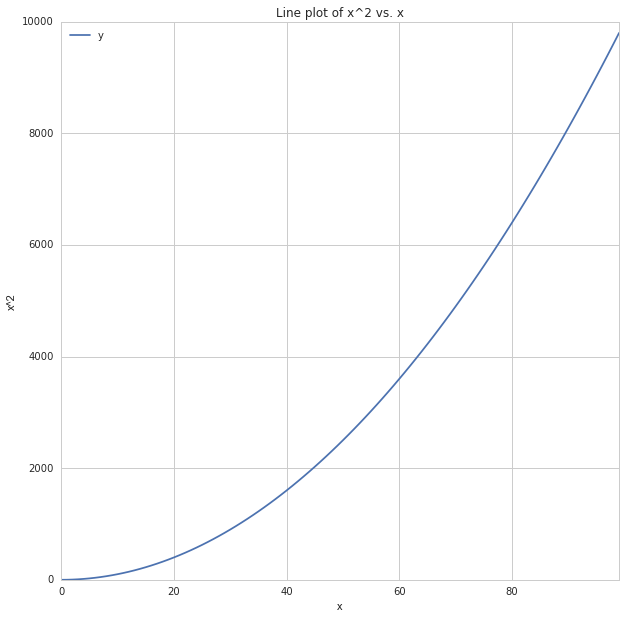

In [47]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
df.plot(x = 'x', y = 'y', ax = ax) ## line is the default plot type
ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('x') # Set text for the x axis
ax.set_ylabel('x^2')# Set text for y axis

****
#### Exercise

Now that you have seen how to create some simple plots, its your turn to give this a try. Create the following scatter plot:

- Plot ``engine-size`` against ``price``.
- Set the figure size to 8 X 8.
- Provide a meaningful title, x-axis label, and y-axis label. 

****

### Bar plots

Bar plots are used to display the counts of unique values of a catgorical variable. The height of the bar represents of the count for each unique category of the variable. 

It is unlikely that your pandas data frame includes counts by category of a variable. Thus, the first step in making a bar plot is to compute the counts. Fortunately, pandas has a ``value_counts`` method. The code below uses this method to create a new data frame containing the counts by ``make`` of the car. 

In [48]:
counts = auto_prices['make'].value_counts() # find the counts for each unique category
counts

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: make, dtype: int64

You can see the ordered list of counts by make above. Notice that this data frame is much smaller than the original, since it only needs one row for each unique value of the make. 

Now, make the bar plot using the ``counts`` data frame, create the bar plot of number of autos by make. Notice, that the recipe for this chart is the same as we have used for scatter plots and line plots, just using the ``.plot.bar`` method. 

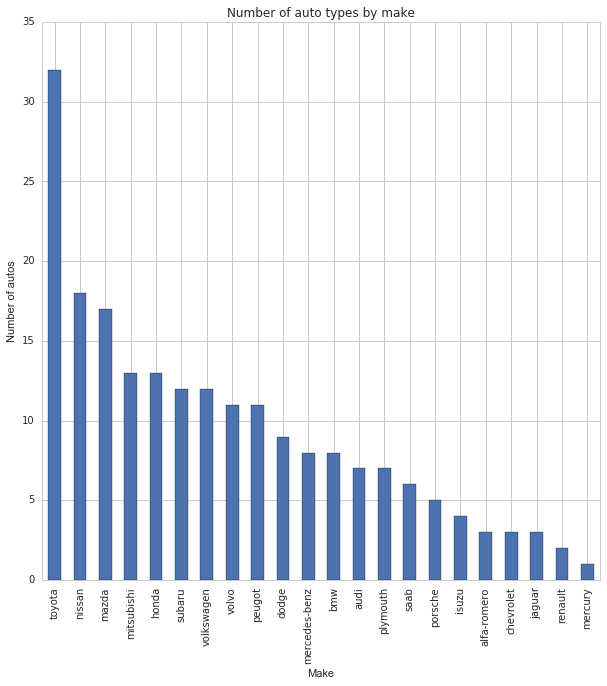

In [49]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of auto types by make') # Give the plot a main title
ax.set_xlabel('Make') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

The bar plot clearly shows which auto manufacturers have the largest number of models. The more specialized makes have relatively fewer models. 

### Histograms

Histograms are related to bar plots. Histograms are used for numberic variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values within a bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code below follows our same basic recipe to create a histogram of ``engine-size``. Notice however, that the column of the data frame we with to plot is specified by name as ``auto_prices['engine-size']``.

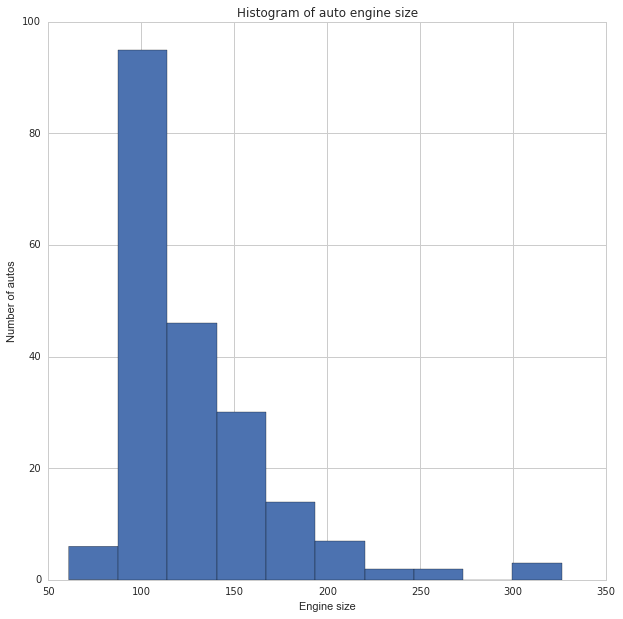

In [50]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices['engine-size'].plot.hist(ax = ax) # Use the plot.hist method on subset of the data frame
ax.set_title('Histogram of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine size') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

The histogram shows that the distibution of engine size is skewed toward small engines. There are also a few autos with very large engines, which appear as outliers. 

### Box plots

Box plots, also known as box and wisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distirbution of data values. In this respect, box plots are comparable to histograms, but are quite different in presenation. 

On a box plot the median value is shown with a dark bar. The inner two qartiles of data values are contained within the 'box'. The 'wiskers' enclose the majority of the data. Outliers are shown by symbols byond the wiskers.

Several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

The code in the cell below generally follows the recipe we have been using. The data frame is subsetted to two columns. One column contains the numeric values to plot and the other column is the group by variable. In this case, the group by variable is specified with the ``by = 'fuel-type'`` argument. 

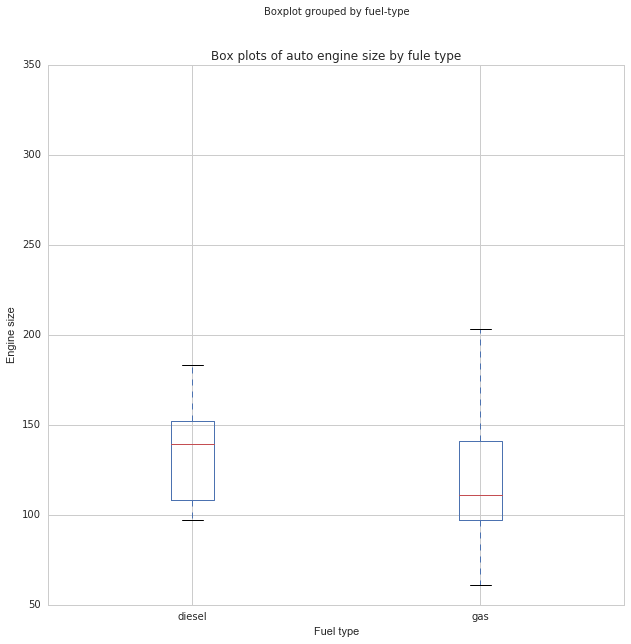

In [51]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
auto_prices[['engine-size','fuel-type']].boxplot(by = 'fuel-type', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

Examine the plot above and notice the differences in the distribution of engine size by fuel type. There is considerable overlap in the inter-quartile range (the range within the boxes), with gas cars haveing generally smaller engines. The median engine size (the red bar) for gas cars is noticeably lower than for diesel cars. However, the range of engine sizes for gas cars is greater, including a few outliers. It is likely, these are the outliers we saw in the histogram. 

### Kernel density plots and introduction to seaborn

Up until now we have been working exclusively with the plotting methods in pandas. We will now start working with the seaborn package.  Seaborn is a newer Python package which abstracts lower level matplotlib charts.Seaborn also includes some more cutting-edge chart types.

If you have not done so, you will need to install seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your compute type the following command. If no errors occur, you will have installed seaborn. 

``pip install seaborn``

 Kernel density plots are similar in concept to a histogram. A kernel density plot displays the values of a smoothed density curve of the data values. In other words, the kernel density plot is a smoothed version of a histogram.
 
 The code in the cell below creates a violine plot using the following recipe:
 
 - Import the seaborn package,
 - Set a style for the plot grind.
 - Define the ``kdeplot`` of the engine-size column.

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


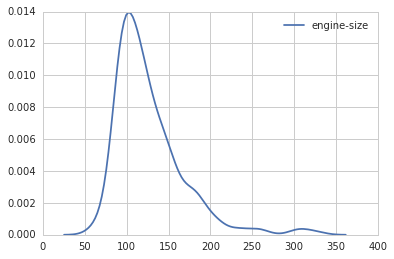

In [52]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'])

The KDE plot results are similar to what we observed with the histogram of engine size. Engine size is skewed toward the small size, and there are outliers of a few cars with large engines clearly visible. 

As we did with pandas plots, we control the properties of a seaborn plot by specifing axes. The code in the cell below extends our simple recipe for seaborn plots:

- Define a figure.
- Define one or more axes on the figure.
- Set a style for the plot grind.
- Define the ``kdeplot`` of the engine-size column.
- Use methods on the axes to control attributes like titles and axis labels.

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


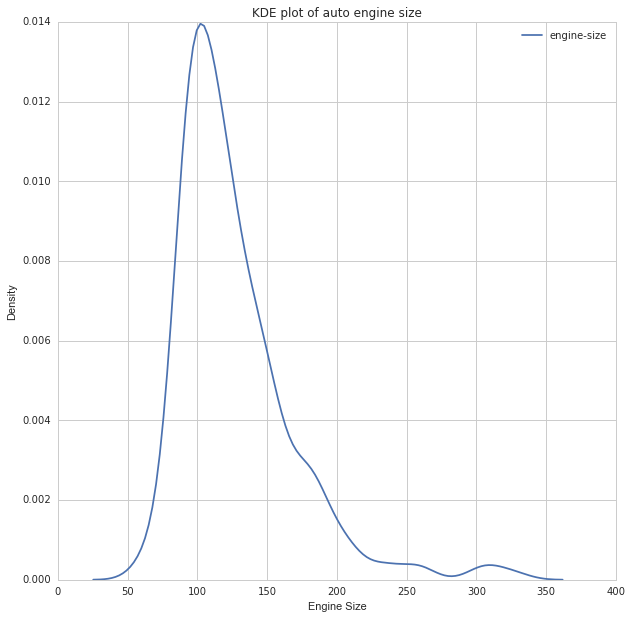

In [53]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_prices['engine-size'], ax = ax)
ax.set_title('KDE plot of auto engine size') # Give the plot a main title
ax.set_xlabel('Engine Size') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

### Violine plots

Next, we will use seaborn to create a violin plot. A violine plot combines attributes of boxplots and a kernel density estimation plot. Like a box plot the violin plots can be stacked, with a group by operation. However, the violin plot provides a kernel density estimate for each group. As with the box plot, violin plots allow you to display two dimensions of your data set.

The code in the cell below follows the recipe we have laid out for seaborn plotting. The ``sns.violinplot`` method as more arguments than the kdeplot method. 

- The columns used for the plot are set with the ``x`` and ``y`` arguments. 
- The ``x`` column is the group by variable.
- The ``data`` argument specifies a pandas data frame or a numpy array.

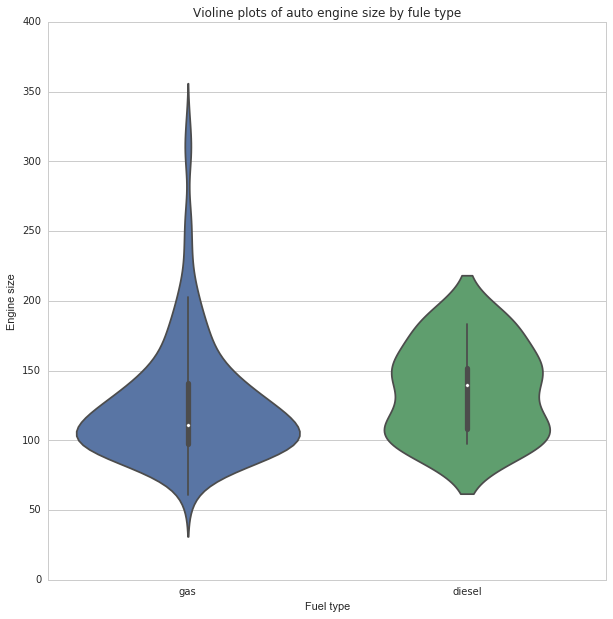

In [54]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'engine-size', data = auto_prices, ax = ax)
ax.set_title('Violine plots of auto engine size by fule type') # Give the plot a main title
ax.set_xlabel('Fuel type') # Set text for the x axis
ax.set_ylabel('Engine size')# Set text for y axis

The differences in the distribution of engine sizes between gas and diesel cars is clearly visible in the violin plots. We can confirm that the engine size of gas cars is skewed to the small size. There are some gas cars with very small engine sizes and a number of autos that appear as outliers with large engines. The distibution of diesel engine sizes is more uniform. 

## Viewing multiple dimensions with asthetics

We have now explored some basic plot types. All of the plots we have created so far are projected onto a two dimensional surface. Thus, we have been limited to visualization of 

Now, we will use plot asthetics to view additional dimensions of the data set. Specific astheics are used to project additonal dimensions onto a two dimension plot. Additionally, carefull choice of plot asthetics can highlight certian aspects of a data set you are exploring.   

There are many possible asthetics one can use for visualization. Specific examples we will work with here include:

- Color
- Transparency
- Size
- Marker shape
- Aesthetics specific to plot type

While using asthetics with a bit of cleverness,can lead to interresting insights about a data set. Don't over do it! To many colors, shapes and sizes can be confusing, obfuscating rather than enlightening. 

### Color

Color can be used to view an additional dimension on a scatter plot. A categorical factor can be show using different colors for the different categories. 

*****
**Caution!** Make sure you use choose a pallet with distinctive colors for each cateogry. Invariably too many categories using similar colors are hard to see and imposible to interpret. 
****

The code in the cell below using the ``hue`` argument to add a third dimension, ``fuel-type`` to a scatter plot. A color pallette is also specified. 

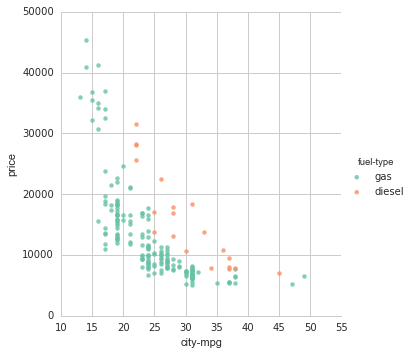

In [55]:
sns.lmplot(x = 'city-mpg', y = 'price', data = auto_prices, hue = "fuel-type", palette="Set2", fit_reg = False)     

In the above plot we can see that a diesel car is generally more costly at a given fuel efficiency. We can also see that all of the lest efficient and most expensive cars have gas engines. 

If we are willing to create more code, we can gain a great deal more control over plot asthetics. The code in the function shown below divides the data into to subsets and plots these subsets with different asthetics on the same set of axes. The recipe is:

- Import the required packages
- Loop over a list of column names for the horizontal axis. In this example we only specify one.
- Define a figure and axes for the plot
- Subset the data by ``gas`` and ``diesel`` cars.
- If the subset has more than zero members create scatter plots with the asthetics difined. In this case, the attribute is color defined as either ``DarkBlue`` or ``Red``.
- Create a list of patches and display the patches for the ledgend. 

'Done'

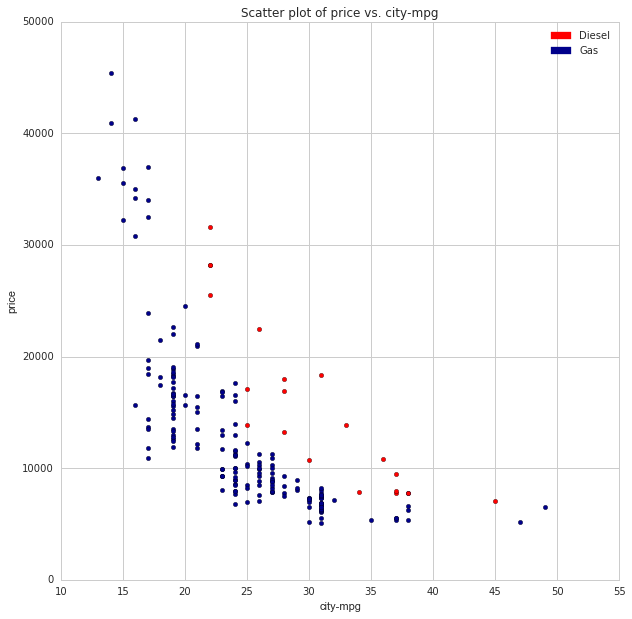

In [56]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_prices, ['city-mpg'])

The above scatter plot is similar to the previous one. Notice that the colors are more distinctive. A similar effect can be achieved with seaborn plots by choosing another color pallette. 

### Transparency

In the scatter plot above, notice there are areas on the plot with dense clusters of points. In particluar, there are overlapping points for gas cars with city mpg between 19 and 31 (mpg is apparently reported in integer units). 

Because of the 'over-plotting' effect is is hard to see just how many cars are represented in some regons of the plot. Transparency, is a useful asthetic to overcome over-plotting. Transparency is defined on a scale from 0 (completely transparent, or invisible) to 1 (perfectly opaque). By choosing a reasonable transparency values you can get a feel for how many points are clustered in a small area of a plot. 

The code in the cell below follows the aforementioned recipe. A transparency argument, ``alpha``, has been added. 

['city-mpg']

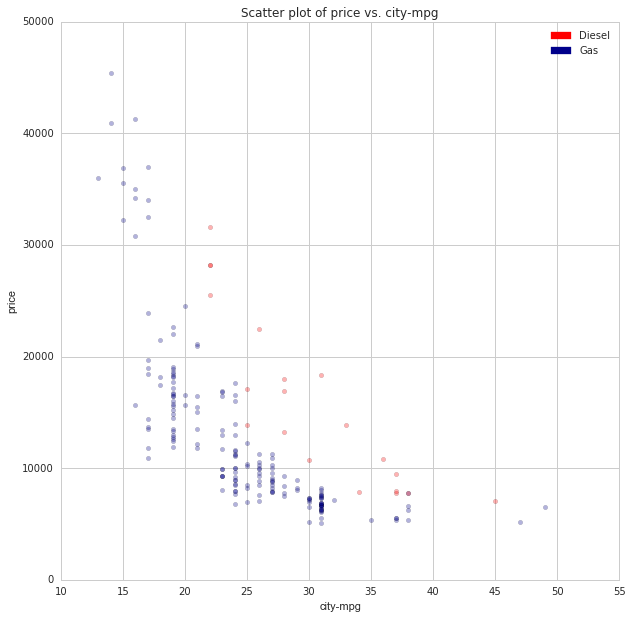

In [57]:
def auto_color(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha = 0.3) 
        ax.set_title('Scatter plot of price vs. ' + col)
        red_patch = mpatches.Patch(color='Red', label='Diesel')   
        blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
        plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_color(auto_prices, ['city-mpg'])

With the transparency set to 0.3, you can now better see the density of autos in areas of the plot with significant overplotting. Notice, how changing this asthetic changes your view of the distributon of data on the city mpg versus price projection. Most gas cars are clustered in a small range of price and fuel efficiency.

****
#### Exercise
So far in our exploration of the automotive data with scatter plots we have focused on the relationship between price and city mpg. In the exercise you will create plots for some additional columns:

- Create a new code cell and copy the code from the code cell above and copy it into the new cell.
- Change at least one of the color choices.
- Call the ``auto_color`` function with a list of different columns: ``['engine-size', 'curb-weight']``.
- Examine the resulting plots. What can you learn from these plots. 

****

### Using marker size

Another asthetic which can project an additional dimension onto a two dimensional plot is marker size. The code in the cell below uses the scaled size of the marker to indicate engine size. 

['city-mpg']

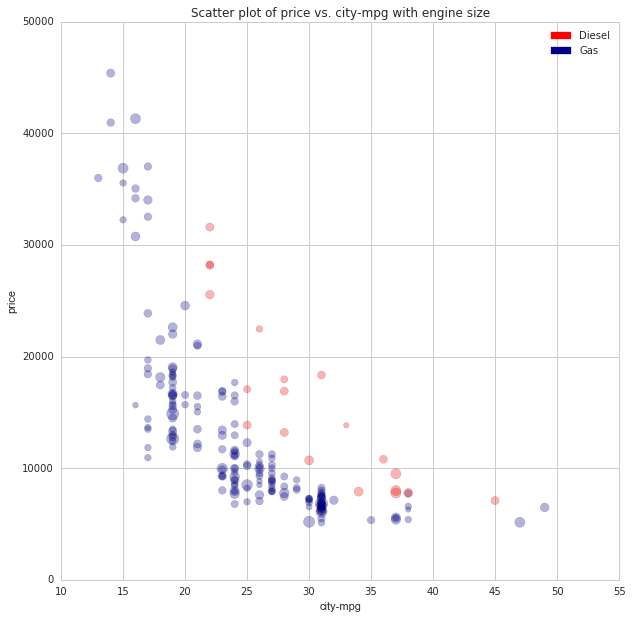

In [58]:

def auto_size(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .5 * auto_prices['engine-size'], alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .5 * auto_prices['engine-size'], alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return plot_cols
auto_size(auto_prices, ['city-mpg'])    

Examine the above plot noticing the different marker sizes. With larger markers, setting transparency is more necessary than ever. 

You may notice that the difference in engine size is not always apparent in the above plot. Using marker size can be a bit tricky. Another option is to use the square of the value being projected to determine marker size. The area of the marker is then proportional to the value of interest, rather than the less noticeable marker size. 

The code in the cell below use the square of engine size to determine marker size.  

'Done'

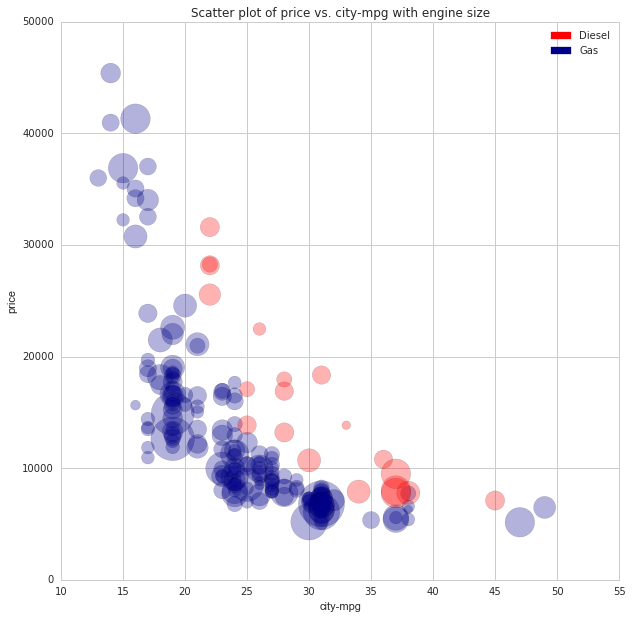

In [59]:

def auto_size_2(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s= .02 * auto_prices['engine-size'] * auto_prices['engine-size'], 
                       alpha = 0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', s= .02 * auto_prices['engine-size']  * auto_prices['engine-size'], 
                       alpha = 0.3) 
    ax.set_title('Scatter plot of price vs. ' + col + ' with engine size')
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size_2(auto_prices, ['city-mpg']) 

Examine the above plot. Notice that the differences in engine size are much more apparent when we use area to determine marker size. 

### Using marker shapes

Marker shape can be used to project an additonal dimension onto a two dimensional plotting surface. Typically, different marker shapes are used to indicate the categories of a categorical variable. As with other asthetics, don't over do it. Too many similar markers on a chart will only obfuscate the relationships you are trying to show. 

The code in the cell below using different marker shapes to indicate standard and turbo aspiration cars. 

'Done'

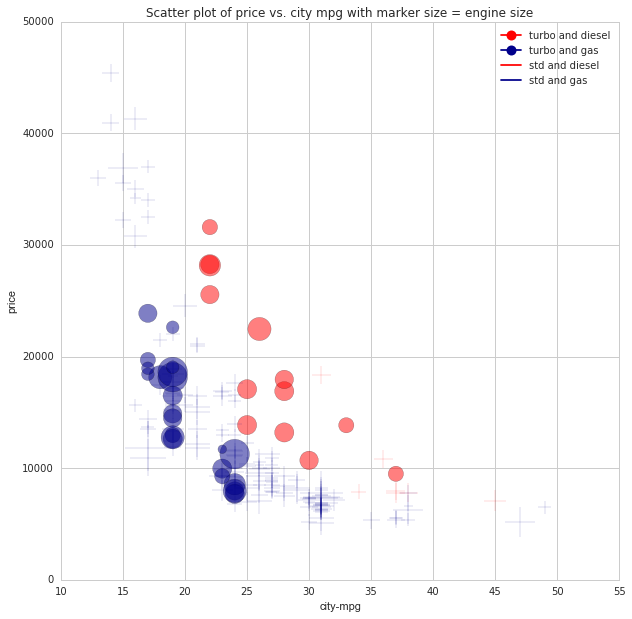

In [60]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(auto_prices)

The above plot, projects five dimensions onto the two dimensional plot surface: price, city mpg, engine size, aspiration type, and fuel type. It takes some time and effort to fully understand all of the information provided. 

Some conclusions we can draw from the chart above include:

- The most expensive cars have larger, standard aspiration, gas engines. 
- Most diesel cars use tubo aspiration and these tend to be more expensive. 
- Turbo aspiration gas engine cars are in the low range of fuel efficiency, but in the middle of the pice range. 
- Some lower cost cars have large gas engines. 

### Plot specific asthetics - Histogram bins

We have used some fairly general asthetics to bring forth relationships in our dataset. We will now look at some additional asthetics which tend to be more chart type specific. 

As a first example, we will examine the effect of changing the number of bins in a histogram. The code below plots the histogram of engine size using different numbers of bins; the default of 10 bins and 40 bins. This is also the first time we have placed multiple sets of axes on the same figure. The first line of code defines two subplots in one row on the figure.  

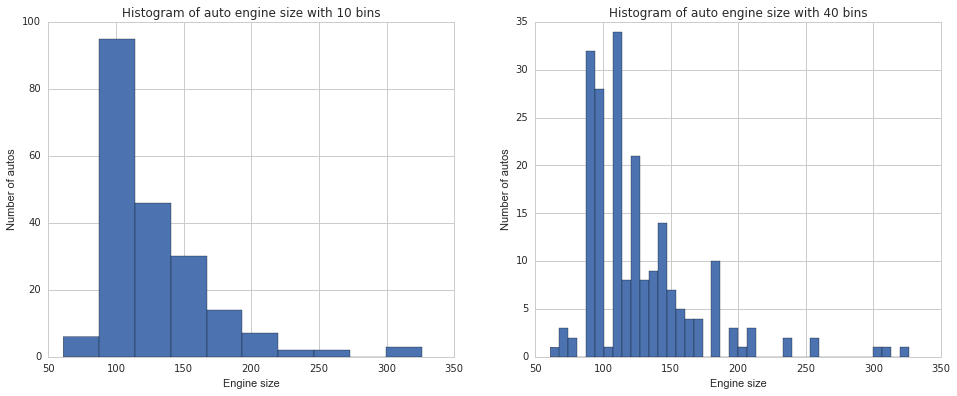

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins') # Give the plot a main title
ax[0].set_xlabel('Engine size') # Set text for the x axis
ax[0].set_ylabel('Number of autos')# Set text for y axis
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

Notice that the histogram with 10 bins gives a smoother result, which may be better for obtaining an overall impression of the distribution. The histogram with 40 bins shows more detail, particularly for the outliers. 

### Plot specific asthetics - Split violin plot

The violin plots supported in seaborn allow you to group the data by a binary categorical variable. In the code shown below, the ``hue`` argument is used to show the KDEs of standard and turbo aspiration cars, for grouped by the ``x`` axis varable of fuel type. The resulting plot shows three dimensions: price, fuel type and aspiration. 

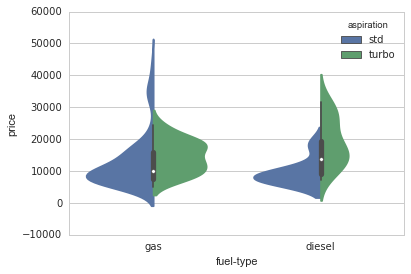

In [62]:
import seaborn as sns
sns.set_style("whitegrid")
sns.violinplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="aspiration",  split=True)

From the plot above, we can see that standard aspiration gas engine cars have the widest range of prices. We can also see that diesel cars tend to be more expensive. Finally both gas and diesel engine cars with standard aspiration have prices skewed to the lower side. 

### Plot specific asthetics - Box plots

Using seaborn we can add group data for box plots by ``hue``, much as we just did with violin plots. The code below uses the ``hue`` asthetic to group the cars by body style. As before, the ``x`` axis groups the autos by fule type. 

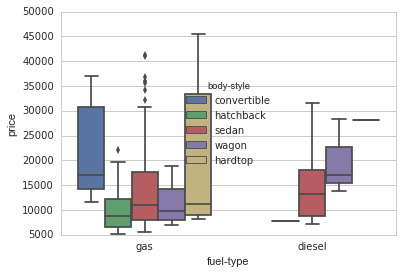

In [63]:
sns.set_style("whitegrid")
sns.boxplot(data = auto_prices, x = 'fuel-type', y = 'price', hue="body-style")

Examine the plot, noticing several interesting relationships including:

- Gas hardtops have the widest range of time, followed by gas convertibles. 
- There are few available body styles for diesel cars. 
- Gas hatchbacks are generally the lowest cost cars, follow by gas and diesel sedans.
- There are two diesel cars with unique body types. A different plot or a simple subsetting of the data is required to indentify these body types.

****
#### Exercise
You have now seen a number of examples of using plot asthetics to highlight various relationships in the data set. You can continue to explore the data set using asthetics. Try the following:

- Create a new code cell below.
- Copy the code used for the previous violin plot into the new cell.
- Change the ``x`` group by variable to ``'drive-wheels'``.
- Examine the resulting plot. What new information is now apparent? 
****

## Multi-axis and Facet Plots

We have explored basic plot types and using asthetics to project multiple dimenstions onto basic plot types. Now we will investige the use multiple plot axes and of a technique known as faceting. Faceting involves using values of categorical or numeric variables to create a systematic grid of related plots. Faceting goes by several other monikers, including conditioned plotting or lattice plotting. 

We will now explore several aspects of these 

- Pair plots with marginal density
- Pairwise scatter plots
- Multi-asis plots
- Faceted plots



### Pair plot with marginal density

A simple multi-axis plot type is a scatter plot with the marginal density of each diminsion shown along either the horizontal or vertical axis.

The code in the cell below using the seaborn ``jointplot`` method to create just such a plot. The columns to be plotted on the x and y axis, along with the name of a pandas data frame or numpy array are specified as arguments. The transparency argument ``alpha`` is specified to deal with overplotting. 

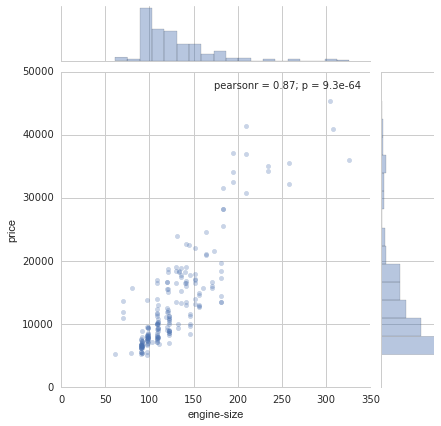

In [64]:
sns.set_style("whitegrid")
sns.jointplot('engine-size', 'price', data = auto_prices, alpha = 0.3)

The above plot shows the relationship between price and engine size. The marginal distribution of price is shown along the y axis and the marginal distribution of engine size is shown along the x axis. 

### Pair wise scatter plots

Pair wise scatter plots, also know as scatter plot matrices, allow us to view multiple dimensions of a data set on one plot. A scatter plot is shown of each variable versus all other variables, arranged in an array. Each variable is shown on both the vertical and horizontal axes of the scatter plots. Other plot types can be placed along the diagonal of the array. 

Code to create a pair wise scatter plot for certain variables in the auto price data set is shown in the cell below. The recipe is:

- Define a list of the columns we wish to display.
- Use the seaborn ``pairplot`` method to display the pairwise scatter plots of the subset of the pandas data frame or numpy array. 
- An argument to ``pairplot`` defines a color palette.
- An argument to ``pairplot`` defines KDE plots be placed along the diagonal of the array. 

C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


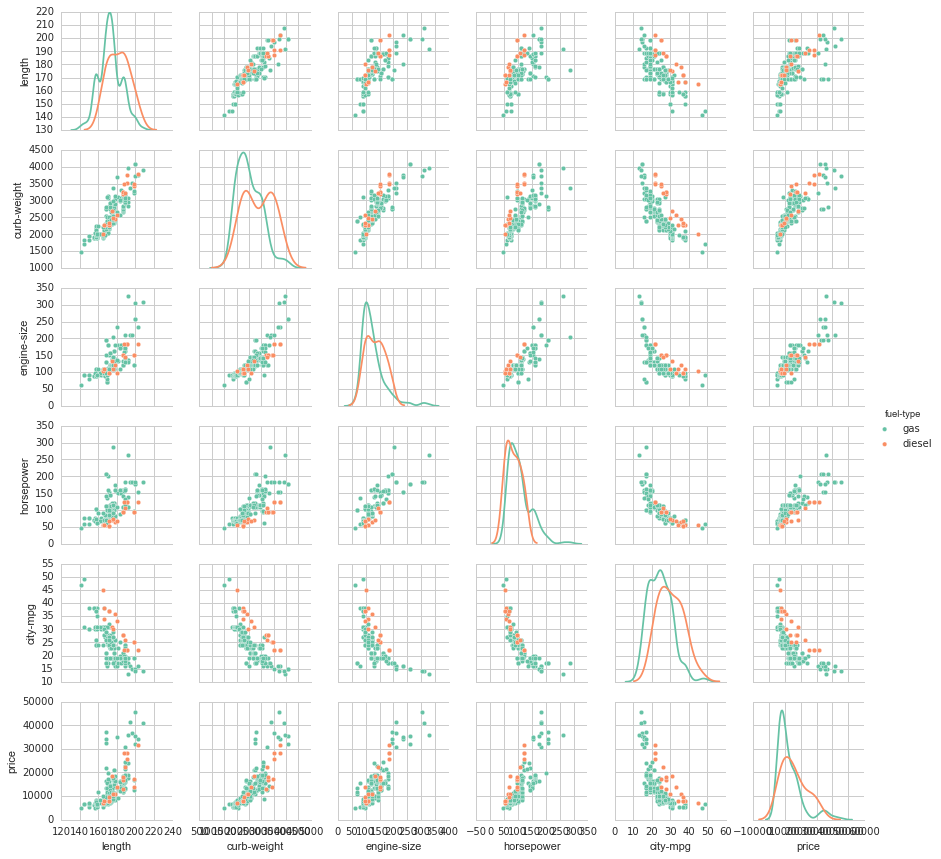

In [65]:
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "fuel-type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel-type', palette="Set2", diag_kind="kde", size=2)

There is a great deal of information on the above plot. Examine this plot, noticing at least the following:

- There are KDE plots grouped by fuel type for each of the variables specified. 
- Autos with larger length, curb weight, engine size, and horse power are more expensive.
- Cars with higher curb weights tend to be longer and have larger engines. 
- Cars which are longer, heavier cars, have larger engines, or more horsepower are less fuel efficient.  

### Multi-axis plots

In a previous exercise you created a first plot with multiple sets of axes. We will now extend this concept to a two dimensional array of axes. Data plotted in each cell on the grid can be subsetted or grouped by one or more variables. Thus, the two dimensional grid is a method for projecting at least two additonal dimensions of the data set onto the two dimensional plot surface.  

The function defined in the cell below creates a two dimensional array of histograms. The recipe for this function is:

- Define four arguments for the funciton, the pandas data frame, the column to plot in the histograms, the variable to group by in the horizontal direction and the varible to group by in the vertical direction. 
- A figure with a 2x2 array of axes is defined.
- The unique values of the x and y axes group by variables are obtained.
- A pair of loops interate over the unique values of the x and y axes group by variables.
- The data are subset by the values of the x and y axes group by variables, and the plot method exectued. Note a single element of the axes array is used for each plot.
- Other attributes are defined for the axes set being plotted.  

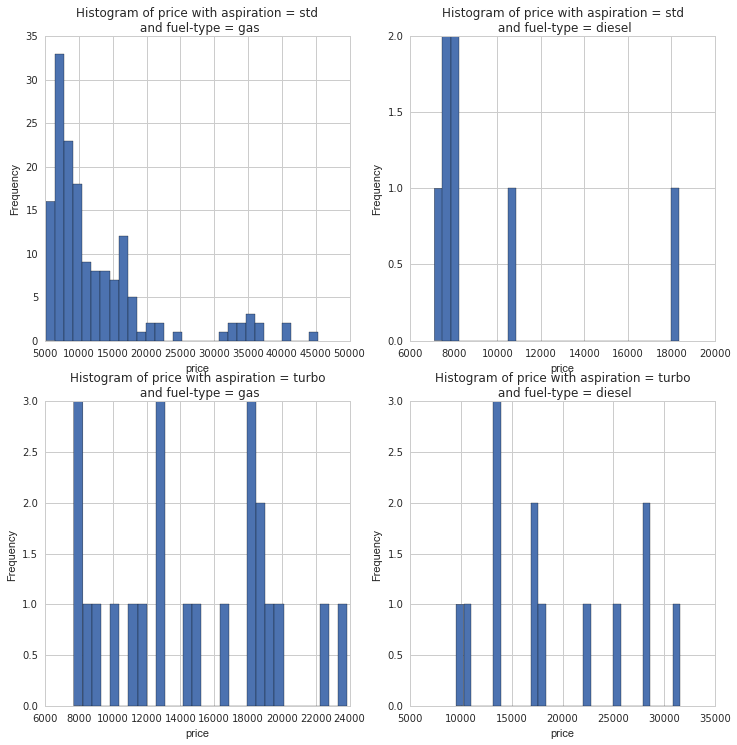

In [66]:
def plot_multi(df, col, xcol, ycol):
    fig, ax = plt.subplots(2, 2, figsize = (12, 12))
    xcols = df[xcol].unique()
    ycols = df[ycol].unique()
    for i, xcl in enumerate(xcols):
        for j, ycl in enumerate(ycols):
            auto_prices.ix[(df[xcol] == xcl) & (df[ycol] == ycl), col].plot.hist(ax = ax[i,j], bins = 30)
            ax[i,j].set_title('Histogram of ' + col + ' with ' + xcol + ' = ' + xcl + '\n and ' + ycol + ' = ' + ycl) 
            ax[i,j].set_xlabel(col) 
plot_multi(auto_prices, 'price', 'aspiration', 'fuel-type')            

Examine these plots and notice the following:
 - The price of standard aspiration cars is skewed to the low end.
 - The price of turbo aspriation cars is fairly uniform over a wide range. 


### Facet plots

We created the previous plots by explicitly defining the axes array. The seaborn package allows us to create the same time of faceted plots with much less code, but with a bit less control. The code in the cell below does just this, following this recipe:

- A ``FacetGrid`` is defined for the data set. In this case we have only one facet (group by variable), across columns. 
- The ``map`` method is applied to the facet grid with a plot type specified.
- In this case the the plot type uses the ``regplot`` method to create a scatter plot. 

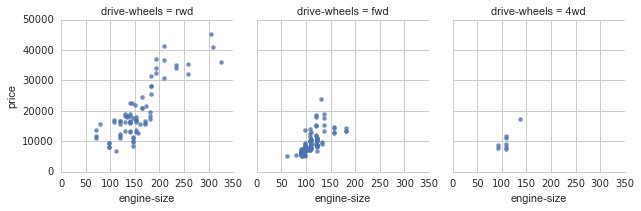

In [67]:
g = sns.FacetGrid(auto_prices, col="drive-wheels")
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

The above plot shows the relationship between pricec and engine size for cars with different drive wheel types. Rear wheel drive cars have the wides range of prices and are generally the most expensive. 

The code in the cell below extends our recipe to include a second dimension for our facet grid. Both a ``row`` and ``col`` agrument are speficied for the ``FacetGrid`` method. 

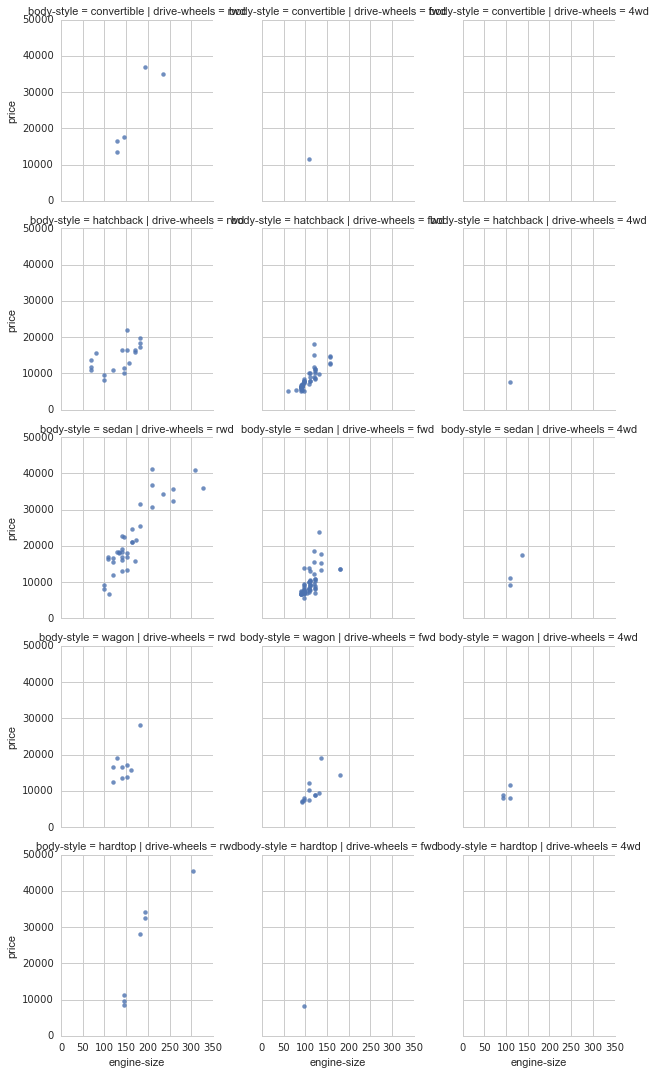

In [68]:
g = sns.FacetGrid(auto_prices, col="drive-wheels", row = 'body-style')
g.map(sns.regplot, "engine-size", "price", fit_reg = False)

There are four dimensions of the data set projected in the above plot. Some combinations of faceting variables have few or even no cars shown. You can draw a number of conclusions from this display including:

- Hatch back and sedans with front wheel drive are clustered at the low end of the price range. 
- Rear wheel drive sedans and convertables have a wide range of prices and are generally the most expensive. 

### Facet plots with asthetics

We can project other dimensions of our data set onto the two dimensions of our plot surface by using ashetics. The code in the cell below uses the ``hue`` argument to the ``FacetGrid`` method to add a fifth dimension to the scatter plot array. 

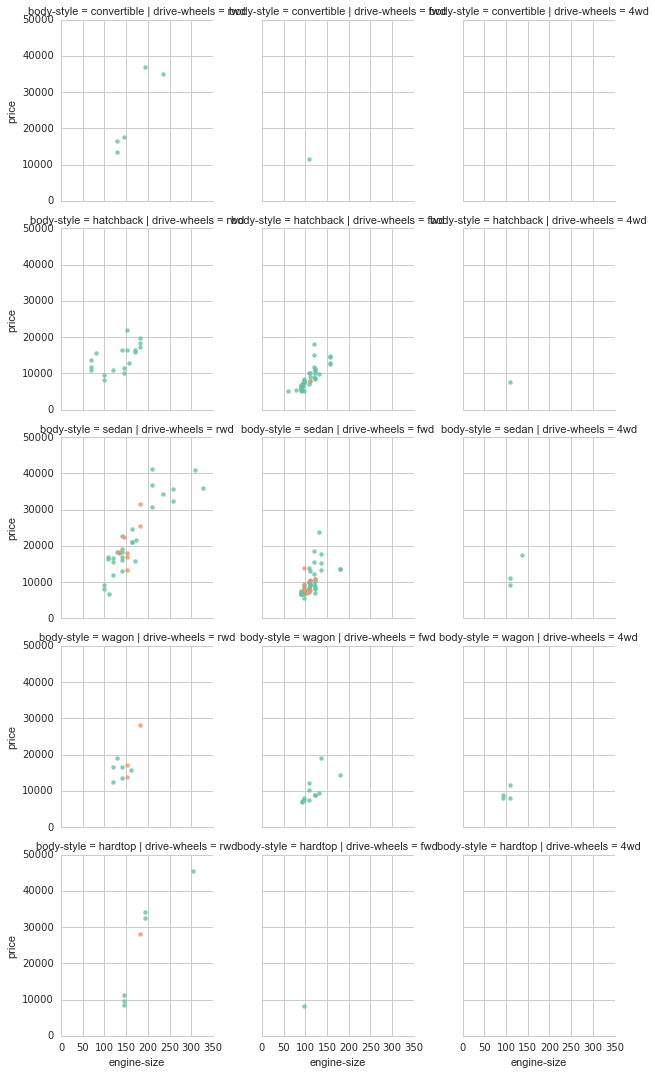

In [69]:
g = sns.FacetGrid(auto_prices, col="drive-wheels", row = 'body-style', hue = 'fuel-type',  palette="Set2")
g.map(sns.regplot, 'engine-size', 'price', fit_reg = False)

In the above plot the diesel cars are now highlighted. For the most part, there does not seem to be anything special about diesel cars in this projection. 

****
#### Exercise

Now its your turn to try some facetted plotting. Do the following:

- Create a new code cell below.
- Copy the code used for the previous example into the new cell.
- Change the ``x`` axis variable to ``'city-mpg'``.
- Examine the resulting plot. What new information is now apparent? 
****

## Summary

We have covered a lot of ground in this tutorial. We have learned quite a bit about the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutoral we have:

- Examined the uses of and methods for creation of several basic plot types.
- Used plot asthetics to project additional dimensions onto a two dimensional plot surface, or to highlight aspects of the relationships in the data.
- Used multi-axis and faceted plots to project additional dimensions onto the two dimensional plot surface. 